# AIRLINE PRICE PREDICTION AND ANALYSIS

 Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_absolute_error

Getting the data set

In [2]:
dataset = pd.read_excel('Data_Train.xlsx')

In [3]:
dataset.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Checking for NULL value and Removing that

In [4]:
data = dataset.copy()
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data[data.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
#droping the null valued row
data[data.isnull().any(axis=1)]
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Extracting the Price column

In [7]:
Y = data.iloc[:,-1:].values
del data['Price']

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


## Data Preprocessing and cleaning

In [9]:
#Checking for repeating values in all feature and removing that
data['Airline'].value_counts()
data['Source'].value_counts()
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [10]:
#found repeating values New Delhi and Delhi
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [11]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [12]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [14]:
data['Additional_Info'].replace('No Info','No info',inplace=True)

In [15]:
data['Additional_Info'].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [16]:
# Filtering the 'Date of journey' and droping the original feature
data["Day_of_Journey"]=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.day
data["Month_of_Journey"]=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.month
del data['Date_of_Journey']

In [17]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3


In [18]:
# Filtering the 'Depature Time' and droping the original feature
data["Dep_Hour"]=pd.to_datetime(data.Dep_Time).dt.hour
data["Dep_Min"]=pd.to_datetime(data.Dep_Time).dt.minute
del data['Dep_Time']

In [19]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,12,5,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,1,3,16,50


In [20]:
# Filtering the 'Arrival Time'  and droping the original feature
data["ArrivalHour"]=pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_Min"]=pd.to_datetime(data.Arrival_Time).dt.minute
del data['Arrival_Time']

In [21]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,ArrivalHour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,1,3,16,50,21,35


In [22]:
# Dealing with Duration Time
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) % 2 != 0 :
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        elif 'm' in duration[i]:
            duration[i]='0h {}'.format(duration[i].strip())
            

dur_min=[]
for i in range(len(duration)):
    dur_min.append( int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]) )
    
data["Duration_minute"] =dur_min
del data['Duration']

In [23]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,ArrivalHour,Arrival_Min,Duration_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,12,5,18,5,23,30,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,1,3,16,50,21,35,285


In [24]:
# Checking for NULL value
data.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Day_of_Journey      0
Month_of_Journey    0
Dep_Hour            0
Dep_Min             0
ArrivalHour         0
Arrival_Min         0
Duration_minute     0
dtype: int64

In [25]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,ArrivalHour,Arrival_Min,Duration_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,12,5,18,5,23,30,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,1,3,16,50,21,35,285


In [26]:
# Creating file for processing
X=data.iloc[:,:].values
y=Y.copy()

In [27]:
X

array([['IndiGo', 'Banglore', 'Delhi', ..., 1, 10, 170],
       ['Air India', 'Kolkata', 'Banglore', ..., 13, 15, 445],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 4, 25, 1140],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 11, 20, 180],
       ['Vistara', 'Banglore', 'Delhi', ..., 14, 10, 160],
       ['Air India', 'Delhi', 'Cochin', ..., 19, 15, 500]], dtype=object)

In [28]:
y

array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]], dtype=int64)

## Dealing with Categorial and String Data

In [29]:
# Encoding the data 

encoder = LabelEncoder()
X[:,0] = encoder.fit_transform(X[:,0])
X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])
X[:,4] = encoder.fit_transform(X[:,4])
X[:,5] = encoder.fit_transform(X[:,5])

In [30]:
X

array([[3, 0, 2, ..., 1, 10, 170],
       [1, 3, 0, ..., 13, 15, 445],
       [4, 2, 1, ..., 4, 25, 1140],
       ...,
       [4, 0, 2, ..., 11, 20, 180],
       [10, 0, 2, ..., 14, 10, 160],
       [1, 2, 1, ..., 19, 15, 500]], dtype=object)

# Buliding the Regression model using decision tree

In [31]:
std_x = StandardScaler()
std_y = StandardScaler()
X = std_x.fit_transform(X)
y = std_y.fit_transform(y)

C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
X

array([[-0.41080484, -1.65835945,  0.81505355, ..., -1.80043628,
        -0.8900139 , -0.93149778],
       [-1.26115217,  0.89001433, -1.15941114, ..., -0.05090913,
        -0.5870944 , -0.38995278],
       [ 0.01436882,  0.04055641, -0.17217879, ..., -1.3630545 ,
         0.0187446 ,  0.97867915],
       ...,
       [ 0.01436882, -1.65835945,  0.81505355, ..., -0.34249699,
        -0.2841749 , -0.91180524],
       [ 2.56541078, -1.65835945,  0.81505355, ...,  0.0948848 ,
        -0.8900139 , -0.95119033],
       [-1.26115217,  0.04055641, -0.17217879, ...,  0.82385444,
        -0.5870944 , -0.28164378]])

In [33]:
y

array([[-1.12553455],
       [-0.30906781],
       [ 1.03978296],
       ...,
       [-0.40296691],
       [ 0.77218138],
       [ 0.57809433]])

## Testing and Trainig set

In [34]:
train_X, test_X, train_y, test_y =train_test_split(X, y, test_size=0.2, random_state=92)

# Fitting to the Model

In [35]:
regressor = DecisionTreeRegressor()
regressor.fit(train_X, train_y)
test_score= regressor.score(test_X, test_y)
training_score= regressor.score(train_X, train_y)

In [36]:
print("the training score is ....." ,training_score)
print("the testing score is ....." ,test_score)

the training score is ..... 0.9959071725047527
the testing score is ..... 0.8037824456978568


In [37]:
# Predicting the model result
y_pred =regressor.predict(test_X)

# Evaluating the model output
rmse =np.sqrt(mean_squared_error(test_y,y_pred))

In [38]:
print("the Root Mean Square Error is .... ",rmse)

the Root Mean Square Error is ....  0.43137297674604913


Text(0.1, 11.2, 'Rmse = 0.431373 \n Score =0.9959071725047527')

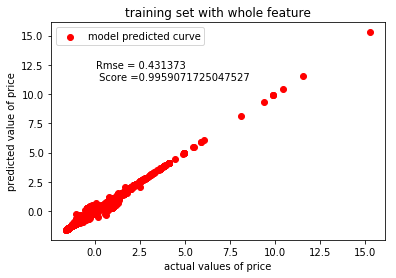

In [39]:
%matplotlib inline
# modelplot training
plt.scatter(train_y,regressor.predict(train_X),color='red',label='model predicted curve')
plt.title('training set with whole feature')
plt.xlabel('actual values of price')
plt.ylabel('predicted value of price')
plt.legend(loc='upper left')
plt.text(0.1,11.2, 'Rmse = %f \n Score =%s' %(rmse,training_score))



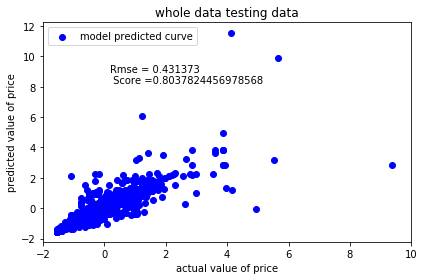

In [40]:
plt.scatter(test_y,regressor.predict(test_X),color='blue',label='model predicted curve')
plt.title('whole data testing data')
plt.xlabel('actual value of price')
plt.ylabel('predicted value of price')
plt.xlim(-2, 10)
plt.tight_layout()
plt.legend(loc='upper left')
plt.text(0.2,8.2, 'Rmse = %f \n Score =%s' %(rmse,test_score))

plt.show()

# Varience Based feature Extraction

In [41]:
# Creating file for processing
X=data.iloc[:,:].values
y=Y.copy()

# Encoding the data 

encoder = LabelEncoder()
X[:,0] = encoder.fit_transform(X[:,0])
X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])
X[:,4] = encoder.fit_transform(X[:,4])
X[:,5] = encoder.fit_transform(X[:,5])

In [42]:
train_X, test_X, train_y, test_y =train_test_split(X, y, test_size=0.2, random_state=92)

C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(*args, **kw)>

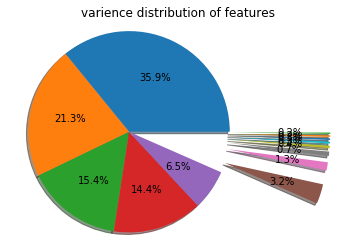

In [43]:

lda= LinearDiscriminantAnalysis(n_components=None)
train_X=lda.fit_transform(train_X, train_y)                
test_X=lda.transform(test_X)
ratio_list=lda.explained_variance_ratio_


explodes=(0.002,0.001,0,0,0,1,1,1,1,1,1,1,1)
figure,axes =plt.subplots()
axes.pie(ratio_list,explode=explodes,shadow=True,autopct='%1.1f%%')
plt.title('varience distribution of features')
axes.axis('equal')
plt.show

In [44]:
#best feature selection     
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=2)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Parametre','Score'] 
pd.options.display.float_format = ' {:.0f}'.format            
featureScores.nlargest(13,'Score')


,Parametre,Score
12,Duration_minute,3344725
3,Route,189036
9,Dep_Min,68390
11,Arrival_Min,50444
4,Total_Stops,23581
6,Day_of_Journey,22599
10,ArrivalHour,18959
0,Airline,14058
8,Dep_Hour,11058
2,Destination,9141


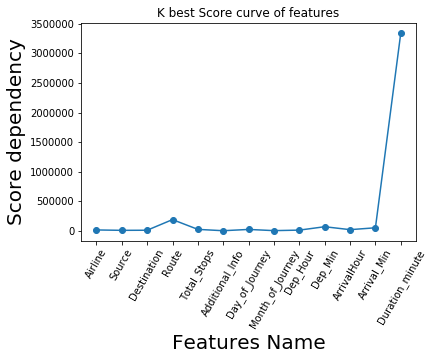

In [45]:
cols = data.columns.tolist()
list_score=[i for i in range(13)]
plt.plot(list_score,fit.scores_,marker='o')
plt.xticks(range(len(list_score)),cols,rotation=60)
plt.xlabel('Features Name',fontsize=20)
plt.ylabel('Score dependency',fontsize=20)
plt.title('K best Score curve of features')
plt.show()

# Now going for single feature model 

In [46]:
X_main=data.iloc[:,-1:].values
X_main

array([[ 170],
       [ 445],
       [1140],
       ...,
       [ 180],
       [ 160],
       [ 500]], dtype=int64)

In [47]:
# Feature Scaling
sc_x1 = StandardScaler()
X_main = sc_x1.fit_transform(X_main)
y = sc_x1.fit_transform(y)

C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
train_X1, test_X1, train_y1, test_y1 =train_test_split(X_main, y, test_size=0.2, random_state=98) 

In [49]:
# Replica model

regressor_main = DecisionTreeRegressor()
regressor_main.fit(train_X1, train_y1)
test_main_score= regressor_main.score(test_X1, test_y1)
training_main_score= regressor_main.score(train_X1, train_y1)

In [50]:
print("the training score is ....." ,training_main_score)
print("the testing score is ....." ,test_main_score)

the training score is ..... 0.4948821093564261
the testing score is ..... 0.5034462408558451


In [51]:
# Predicting the model output

y_pred1= regressor_main.predict(test_X1)

In [52]:
# Evaluating the model output

rmse_main =np.sqrt(mean_squared_error(test_y1,y_pred1))

In [53]:
print("the Root Mean Square Error is .... ",rmse_main)

the Root Mean Square Error is ....  0.6536428097105438


Text(0.1, 11.2, 'Rmse = 0.653643 \n Score =0.4948821093564261')

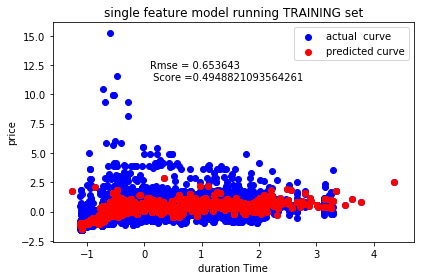

In [54]:
# model taining

plt.scatter(train_X1,train_y1,color='blue',label='actual  curve')
plt.scatter(train_X1,regressor_main.predict(train_X1),color='red',label='predicted curve')
plt.title('single feature model running TRAINING set')
plt.xlabel('duration Time')
plt.ylabel('price')
plt.tight_layout()
plt.legend(loc='upper right')
plt.text(0.1,11.2, 'Rmse = %f \n Score =%s' %(rmse_main,training_main_score))

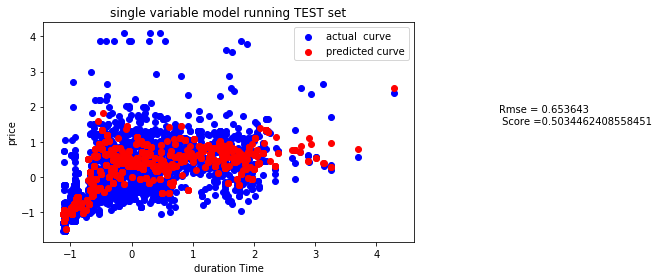

In [55]:
# Test model

plt.scatter(test_X1,test_y1,color='blue',label='actual  curve')
plt.scatter(test_X1,regressor_main.predict(test_X1),color='red',label='predicted curve')
plt.title('single variable model running TEST set')
plt.xlabel('duration Time')
plt.ylabel('price')
plt.tight_layout()
plt.legend(loc='upper right')
plt.text(6,1.5, 'Rmse = %f \n Score =%s' %(rmse_main,test_main_score))
plt.show()

In [56]:
accuracies= cross_val_score( estimator=regressor_main,X= test_X1, y=test_y1 ,cv=50)
accuracies.max()

0.7178025762260599

In [57]:
accuracies= cross_val_score( estimator=regressor_main,X= train_X1, y=train_y1 ,cv=52)
accuracies.max()

0.6464707358007724

# Now dealing with random number value for minimum RMSE , maximum scores

In [58]:
X_layout= []
y_layout_rmse= []
y_layout_mean= []
y_layout_score_test= []
y_layout_score_train= []
for i in range(100):
    X_layout.append(i)
    train_X1, test_X1, train_y1, test_y1 =train_test_split(X_main, y, test_size=0.2, random_state=i) 
    regressor_main = DecisionTreeRegressor()
    regressor_main.fit(train_X1, train_y1)
    test_main_score= regressor_main.score(test_X1, test_y1)
    y_layout_score_test.append(test_main_score)
    training_main_score= regressor_main.score(train_X1, train_y1)
    y_layout_score_train.append(training_main_score)
    y_pred1= regressor_main.predict(test_X1)
    rmse_main =np.sqrt(mean_squared_error(test_y1,y_pred1))
    absolute_error= mean_absolute_error(test_y1,y_pred1)
    y_layout_rmse.append(rmse_main)
    y_layout_mean.append(absolute_error)    

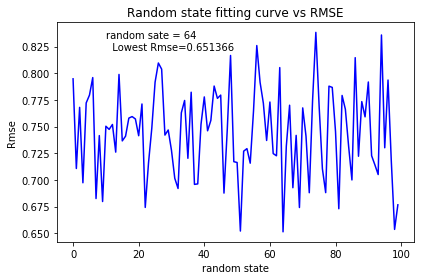

In [59]:
# Plot for lowest rmse

plt.plot(X_layout,y_layout_rmse,color='blue')
plt.title('Random state fitting curve vs RMSE')
plt.xlabel('random state')
plt.ylabel('Rmse')
plt.tight_layout()
plt.text(10,0.822, 'random sate = %i \n  Lowest Rmse=%f' %(y_layout_rmse.index(min(y_layout_rmse)),min(y_layout_rmse)))
plt.show()

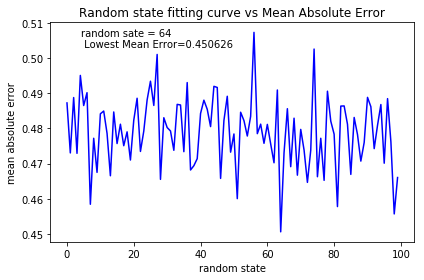

In [60]:
plt.plot(X_layout,y_layout_mean,color='blue' )
plt.title('Random state fitting curve vs Mean Absolute Error')
plt.xlabel('random state')
plt.ylabel('mean absolute error')
plt.tight_layout()
plt.text(4.3,0.503, 'random sate = %i \n Lowest Mean Error=%f' %(y_layout_mean.index(min(y_layout_mean)),min(y_layout_mean)))
plt.show()

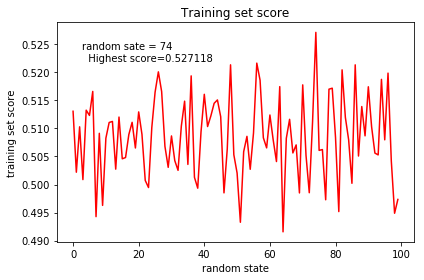

In [61]:
# plot for highest Train score

plt.plot(X_layout,y_layout_score_train,color='red')
plt.title('Training set score')
plt.xlabel('random state')
plt.ylabel('training set score')
plt.tight_layout()
plt.text(2.7,0.522, 'random sate = %i \n  Highest score=%f' %(y_layout_score_train.index(max(y_layout_score_train)),max(y_layout_score_train)))
plt.show()

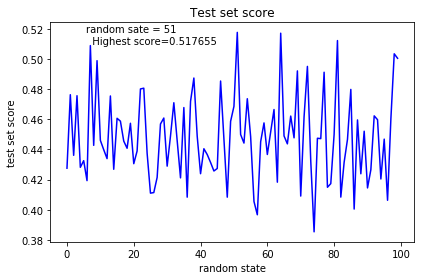

In [62]:
# plot for highest Test score

plt.plot(X_layout,y_layout_score_test,color='blue')
plt.title('Test set score')
plt.xlabel('random state')
plt.ylabel('test set score')
plt.tight_layout()
plt.text(5.7,0.51, 'random sate = %i \n  Highest score=%f' %(y_layout_score_test.index(max(y_layout_score_test)),max(y_layout_score_test)))
plt.show()

# As a result Random State 64 fit the best for the model

In [63]:
train_X1, test_X1, train_y1, test_y1 =train_test_split(X_main, y, test_size=0.2, random_state=64) 
regressor_main = DecisionTreeRegressor()
regressor_main.fit(train_X1, train_y1)
test_main_score= regressor_main.score(test_X1, test_y1)
training_main_score= regressor_main.score(train_X1, train_y1)

y_pred1= regressor_main.predict(test_X1)

rmse_main =np.sqrt(mean_squared_error(test_y1,y_pred1))
absolute_error= mean_absolute_error(test_y1,y_pred1)

Text(0.1, 11.2, 'Mean Error =0.450626 \n Rmse = 0.651366 \n Score =0.49157181062901456')

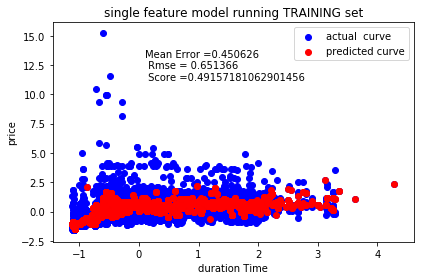

In [64]:
# model taining

plt.scatter(train_X1,train_y1,color='blue',label='actual  curve')
plt.scatter(train_X1,regressor_main.predict(train_X1),color='red',label='predicted curve')
plt.title('single feature model running TRAINING set')
plt.xlabel('duration Time')
plt.ylabel('price')
plt.tight_layout()
plt.legend(loc='upper right')
plt.text(0.1,11.2, 'Mean Error =%f \n Rmse = %f \n Score =%s' %(absolute_error,rmse_main,training_main_score))

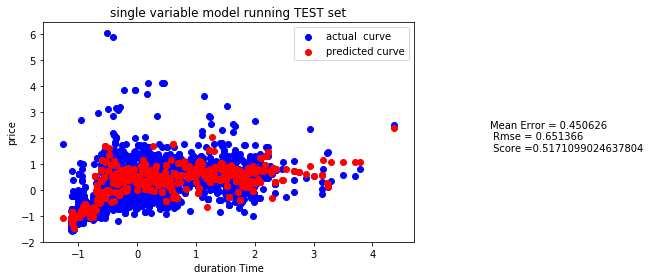

In [65]:
# Test model

plt.scatter(test_X1,test_y1,color='blue',label='actual  curve')
plt.scatter(test_X1,regressor_main.predict(test_X1),color='red',label='predicted curve')
plt.title('single variable model running TEST set')
plt.xlabel('duration Time')
plt.ylabel('price')
plt.tight_layout()
plt.legend(loc='upper right')
plt.text(6,1.5, 'Mean Error = %f \n Rmse = %f \n Score =%s' %(absolute_error,rmse_main,test_main_score))
plt.show()

# Checking by reducing testing size

In [66]:
train_X1, test_X1, train_y1, test_y1 =train_test_split(X_main, y, test_size=0.15, random_state=64) 
regressor_main = DecisionTreeRegressor()
regressor_main.fit(train_X1, train_y1)
test_main_score= regressor_main.score(test_X1, test_y1)
training_main_score= regressor_main.score(train_X1, train_y1)

y_pred1= regressor_main.predict(test_X1)

rmse_main =np.sqrt(mean_squared_error(test_y1,y_pred1))
absolute_error= mean_absolute_error(test_y1,y_pred1)

Text(0.1, 11.2, 'Mean Error =0.444155 \n Rmse = 0.634795 \n Score =0.4925775997610642')

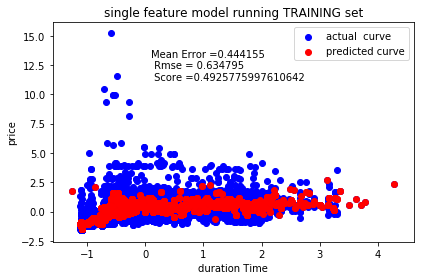

In [67]:
# model taining

plt.scatter(train_X1,train_y1,color='blue',label='actual  curve')
plt.scatter(train_X1,regressor_main.predict(train_X1),color='red',label='predicted curve')
plt.title('single feature model running TRAINING set')
plt.xlabel('duration Time')
plt.ylabel('price')
plt.tight_layout()
plt.legend(loc='upper right')
plt.text(0.1,11.2, 'Mean Error =%f \n Rmse = %f \n Score =%s' %(absolute_error,rmse_main,training_main_score))

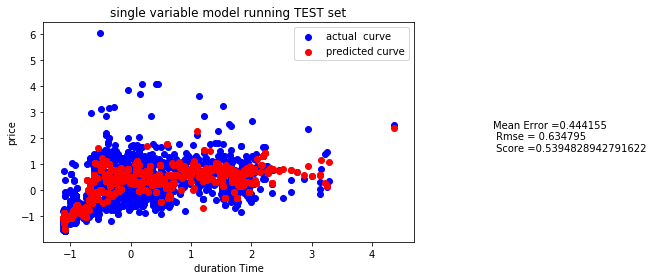

In [68]:
# Test model

plt.scatter(test_X1,test_y1,color='blue',label='actual  curve')
plt.scatter(test_X1,regressor_main.predict(test_X1),color='red',label='predicted curve')
plt.title('single variable model running TEST set')
plt.xlabel('duration Time')
plt.ylabel('price')
plt.tight_layout()
plt.legend(loc='upper right')
plt.text(6,1.5, 'Mean Error =%f \n Rmse = %f \n Score =%s' %(absolute_error,rmse_main,test_main_score))
plt.show()

# Thank You